In [61]:
import pandas as pd
df = pd.read_csv('tweets.csv')

In [62]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [64]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [65]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [66]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [67]:
df = df[['text', 'airline_sentiment']]

In [68]:
import re

In [69]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https:\S+', '', text)
    text = re.sub(r'@\w+|#\w+|d+', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    return text
df['clean_text'] = df['text'].apply(clean_text)

In [70]:
import nltk

In [71]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TOMI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\TOMI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOMI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stop_words = set(stopwords.words('english'))

In [75]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ''.join(tokens)

In [76]:
df['processed_text'] = df['clean_text'].apply(preprocess)

from sklearn.model_selection import test_train_split
y = df['airline_sentiment']
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
X = df['processed_text']

In [96]:
y = df['airline_sentiment'] 

In [91]:
#X = vectorizer.fit_transform(df['processed_text'])

In [97]:
vectorizer = TfidfVectorizer(max_features=3000)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [99]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [100]:
model = MultinomialNB()

In [101]:
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
y_pred = model.predict(X_test_vec)

In [104]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.65      1.00      0.79      1889
     neutral       0.70      0.01      0.02       580
    positive       0.92      0.05      0.10       459

    accuracy                           0.66      2928
   macro avg       0.76      0.35      0.30      2928
weighted avg       0.70      0.66      0.53      2928

[[1887    1    1]
 [ 572    7    1]
 [ 433    2   24]]


In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [106]:
negative_tweets = ' '.join(df[df['airline_sentiment']=='negative']['processed_text'])
positive_tweets = ' '.join(df[df['airline_sentiment']=='positive']['processed_text'])

In [107]:
wordcloud = WordCloud(width=800, height=400).generate(negative_tweets)

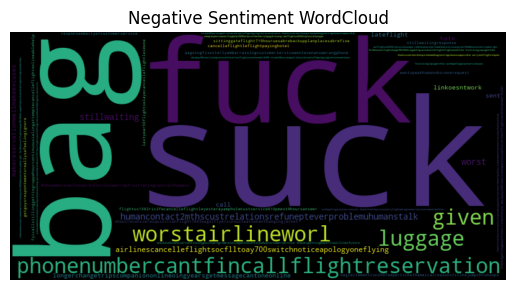

In [108]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Sentiment WordCloud')
plt.show()

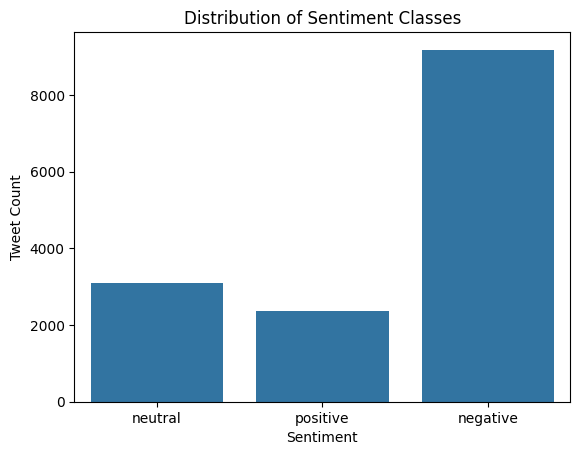

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='airline_sentiment', data=df)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

In [110]:
from sklearn.metrics import classification_report
sentiment_classes = ['negative', 'neutral', 'positive']


print(classification_report(y_test, y_pred, target_names=sentiment_classes))

              precision    recall  f1-score   support

    negative       0.65      1.00      0.79      1889
     neutral       0.70      0.01      0.02       580
    positive       0.92      0.05      0.10       459

    accuracy                           0.66      2928
   macro avg       0.76      0.35      0.30      2928
weighted avg       0.70      0.66      0.53      2928



In [111]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
negative,0.652490,0.998941,0.789375,1889.000000
neutral,0.700000,0.012069,0.023729,580.000000
positive,0.923077,0.052288,0.098969,459.000000
accuracy,0.655055,0.655055,0.655055,0.655055
macro avg,0.758522,0.354433,0.304024,2928.000000
weighted avg,0.704319,0.655055,0.529480,2928.000000


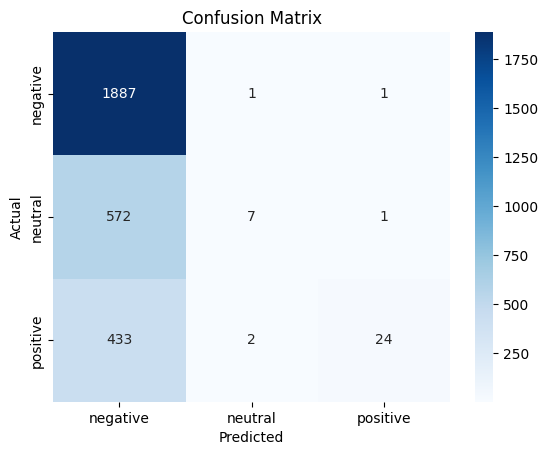

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sentiment_classes, yticklabels=sentiment_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

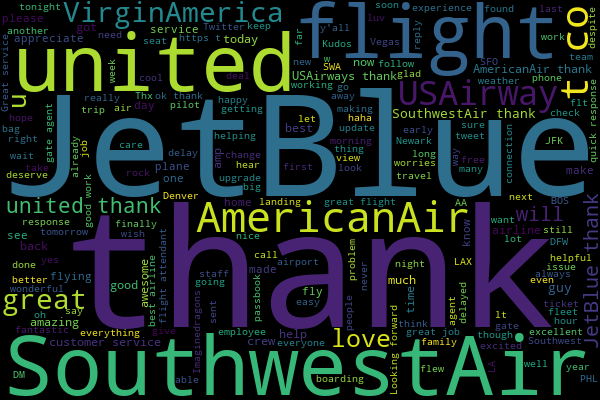

In [113]:
from wordcloud import WordCloud

positive_words = ' '.join(df[df['airline_sentiment']=='positive']['text'])
WordCloud(width=600, height=400).generate(positive_words).to_image()


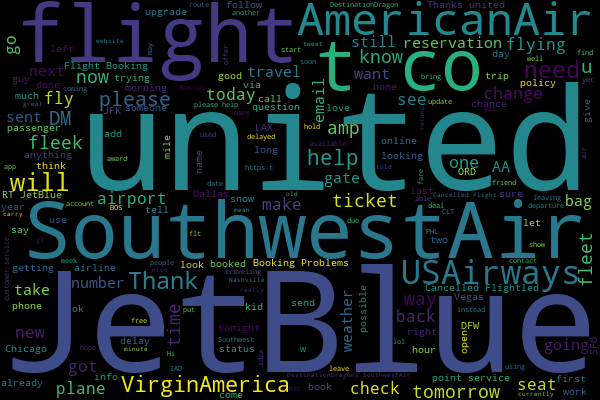

In [114]:
from wordcloud import WordCloud

neutral_words = ' '.join(df[df['airline_sentiment']=='neutral']['text'])
WordCloud(width=600, height=400).generate(neutral_words).to_image()


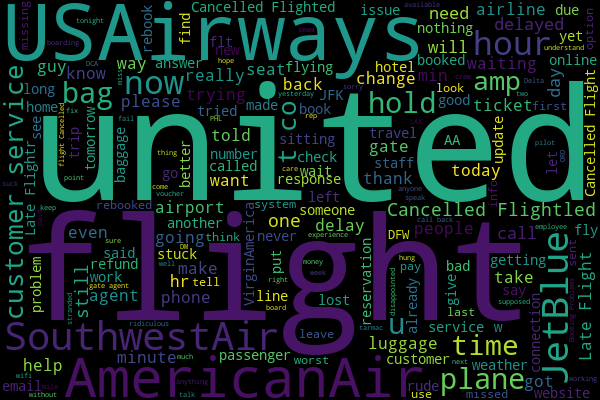

In [115]:
from wordcloud import WordCloud

negative_words = ' '.join(df[df['airline_sentiment']=='negative']['text'])
WordCloud(width=600, height=400).generate(negative_words).to_image()


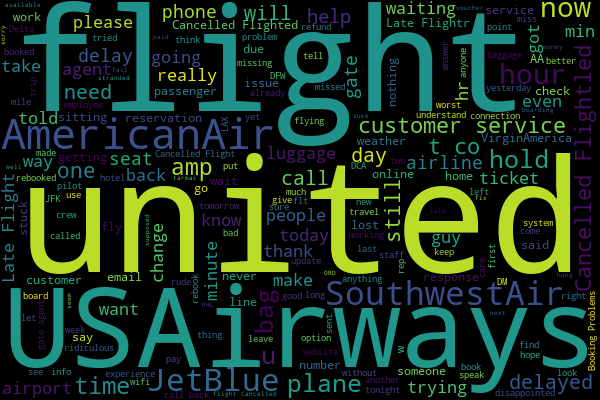

In [116]:
from wordcloud import WordCloud

negative_words = ' '.join(df[df['airline_sentiment']=='negative']['text'])
WordCloud(width=600, height=400).generate(negative_words).to_image()


In [117]:
df.to_csv('Cleaned_Tweets.csv', index = 'False')